# Visualizing the Explanations

### Setting the config file path

In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/home/coder/gretel'

In [2]:
from src.evaluation.evaluator_manager import EvaluatorManager

config_file_path = module_path + '/examples/config/config_autism_custom-oracle_dce.json'
output_file_path = module_path + '/output/asd_custom_oracle/DCESearchExplainer/results_run-0.json'
output_folder = module_path + '/output/'
stats_folder = module_path + '/stats/'

# Verifying that the paths are valid
(os.path.isfile(config_file_path), os.path.isfile(output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

2023-02-08 19:02:04.077037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 19:02:04.230333: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


(True, True, True, True)

### Creating the Evaluator Manager

In [3]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

### Visualizing the results

Showing the json file with the output

In [4]:
with open(output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "autism", "parameters": {}}, "oracle": {"name": "asd_custom_oracle", "parameters": {}}, "explainer": {"name": "dce_search", "parameters": {"graph_distance": {"name": "graph_edit_distance", "parameters": {}}}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.10127878189086914, 0.056531667709350586, 0.05309724807739258, 0.05878615379333496, 0.0541074275970459, 0.055834293365478516, 0.05824136734008789, 0.056952476501464844, 0.05408477783203125, 0.056876420974731445, 0.0630805492401123, 0.0558931827545166, 0.06140756607055664, 0.05955862998962402, 0.05434012413024902, 0.06233930587768555, 0.05592608451843262, 0.0641331672668457, 0.05816340446472168, 0.05443930625915527, 0.05349850654602051, 0.053728580474853516, 0.0

Creating a table with the results

In [5]:
from src.data_analysis.data_analyzer import DataAnalyzer
import pandas as pd

dtan = DataAnalyzer(output_folder, stats_folder)
dtan.aggregate_data()
dtan.aggregate_runs()
dtan.create_tables_by_oracle_dataset()

results_table = pd.read_csv(stats_folder + 'autism-asd_custom_oracle.csv')
results_table

,Unnamed: 0,explainer,runtime,runtime-std,Graph_Edit_Distance,Graph_Edit_Distance-std,Oracle_Calls,Oracle_Calls-std,Correctness,Correctness-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Oracle_Accuracy,Oracle_Accuracy-std
0,0,dce_search,0.054193,0.0,1011.693069,0.0,102.000000,0.0,1.0,0.0,1.311108,0.0,0.544554,0.0,0.772277,0.0
1,1,dummy_explainer,0.001634,0.0,1068.237624,0.0,2.930693,0.0,1.0,0.0,1.384470,0.0,0.544554,0.0,0.772277,0.0


### Analizing a Counterfactual Explanation

In [6]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]
# Obtain the for each data instance its counterfactual explanation
inst_exp_list = ev.get_instance_explanation_pairs()
# Take the first pair instance-explanation as an example
inst, exp = inst_exp_list[0]
# Get the changes between both instances
n_inter, e_inter, n_ori, e_ori, n_cf, e_cf = dtan.compare_graphs(inst.graph, exp.graph)

Showing the steps to get the counterfactual

In [7]:
# Printing the steps needed to obtain the counterfactual
print('Remove Nodes: ', n_ori, '\n', 'Remove Edges: ', e_ori, '\n', 'Add Nodes: ', n_cf, '\n', 'Add Edges', e_cf, '\n')

Remove Nodes:  [] 
 Remove Edges:  [(1, 95), (59, 64), (32, 110), (1, 113), (29, 59), (100, 110), (10, 27), (6, 75), (30, 112), (25, 43), (62, 92), (25, 52), (4, 87), (74, 84), (16, 79), (107, 108), (1, 108), (68, 107), (28, 80), (49, 112), (61, 86), (40, 63), (80, 99), (50, 104), (2, 27), (8, 107), (19, 107), (11, 103), (31, 81), (3, 10), (10, 58), (13, 60), (16, 56), (23, 104), (24, 87), (7, 16), (76, 88), (65, 97), (57, 93), (1, 103), (68, 93), (28, 66), (21, 27), (5, 82), (29, 49), (40, 49), (21, 54), (39, 62), (62, 64), (0, 89), (20, 67), (83, 105), (19, 111), (3, 5), (75, 110), (2, 49), (23, 81), (95, 97), (103, 110), (24, 73), (17, 34), (16, 78), (34, 114), (47, 56), (76, 110), (6, 33), (38, 111), (61, 76), (58, 89), (2, 8), (10, 21), (19, 106), (94, 109), (20, 80), (11, 111), (41, 112), (20, 89), (16, 37), (12, 94), (16, 64), (5, 27), (17, 38), (57, 101), (29, 30), (58, 66), (26, 95), (21, 26), (18, 91), (38, 106), (30, 65), (42, 76), (2, 3), (2, 12), (0, 88), (19, 101), (83, 1

Visualizing the changes in the counterfactual

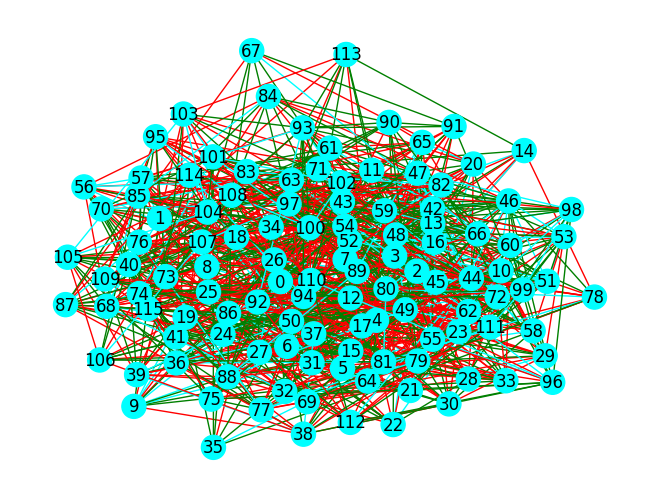

In [8]:
dtan.draw_counterfactual_actions(n_inter, e_inter, n_ori, e_ori, n_cf, e_cf, layout='spring')

The blue elements reamain unchanged between the original instance and the counterfactual, the red ones were removed in the conterfactual example, and the green ones were added.